https://developer.spotify.com/documentation/web-api/tutorials/getting-started

In [1]:
# !pip install python-dotenv
# !pip install spotipy

Importiamo le librerie necessarie

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import os
import pandas as pd
import time
import numpy as np
import json

colleghiamoci al API di Spotify

In [4]:
load_dotenv()
SPOTIPY_CLIENT_ID = os.getenv("SPOTIPY_CLIENT_ID")
SPOTIPY_CLIENT_SECRET = os.getenv("SPOTIPY_CLIENT_SECRET")
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [5]:
# salviamoci l'urn dell'artista
artist_urns = ['spotify:artist:6XYvaoDGE0VmRt83Jss9Sn', 'spotify:artist:1Dt1UKLtrJIW1xxRBejjos']
# chiediamo a Spotify di restituirci le informazioni sull'artista
artist = sp.artist(artist_urns[0])
print(artist)

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6XYvaoDGE0VmRt83Jss9Sn'}, 'followers': {'href': None, 'total': 1122410}, 'genres': ['australian psych', 'double drumming', 'microtonal', 'neo-psychedelic'], 'href': 'https://api.spotify.com/v1/artists/6XYvaoDGE0VmRt83Jss9Sn', 'id': '6XYvaoDGE0VmRt83Jss9Sn', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebae21e90221e814c50033133a', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174ae21e90221e814c50033133a', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178ae21e90221e814c50033133a', 'width': 160}], 'name': 'King Gizzard & The Lizard Wizard', 'popularity': 62, 'type': 'artist', 'uri': 'spotify:artist:6XYvaoDGE0VmRt83Jss9Sn'}


In [6]:
# chiediamo a Spotify di restituirci i top tracks dell'artista
artist_top_tracks = sp.artist_top_tracks(artist_urns[0])
print(artist_top_tracks)

{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6XYvaoDGE0VmRt83Jss9Sn'}, 'href': 'https://api.spotify.com/v1/artists/6XYvaoDGE0VmRt83Jss9Sn', 'id': '6XYvaoDGE0VmRt83Jss9Sn', 'name': 'King Gizzard & The Lizard Wizard', 'type': 'artist', 'uri': 'spotify:artist:6XYvaoDGE0VmRt83Jss9Sn'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/480wRHoZ8rOqp34KYGbD1Z'}, 'href': 'https://api.spotify.com/v1/albums/480wRHoZ8rOqp34KYGbD1Z', 'id': '480wRHoZ8rOqp34KYGbD1Z', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2732c3b34e52b78e68fe4327ddc', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e022c3b34e52b78e68fe4327ddc', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d000048512c3b34e52b78e68fe4327ddc', 'width': 64}], 'is_playable': True, 'name': 'Oddments', 'release_date': '2014-03-07', 'release_date_precision': 'day', 'total_tracks': 12, '

In [7]:
# guardiamo il tipo di oggetto che ci è stato restituito
print(type(artist_top_tracks))
print(artist_top_tracks.keys())
print(type(artist_top_tracks['tracks']))
print(type(artist_top_tracks['tracks'][0]))

<class 'dict'>
dict_keys(['tracks'])
<class 'list'>
<class 'dict'>


In [ ]:
# guardiamo il contenuto di un elemento della lista
print(artist_top_tracks['tracks'][0])

In [ ]:
print(artist_top_tracks['tracks'][0]['name'])
print(artist_top_tracks['tracks'][0]['album']['name'])
print(artist_top_tracks['tracks'][0]['album']['images'][0]['url'])

### Album

In [8]:
artist_albums = sp.artist_albums(artist_urns[0], album_type='album', limit=5, offset=0)
print(artist_albums.keys())
print(type(artist_albums["items"]))
print(len(artist_albums["items"]))

print(artist_albums["items"][0])
print(artist_albums["items"][0].keys())


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
<class 'list'>
5
{'album_group': 'album', 'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6XYvaoDGE0VmRt83Jss9Sn'}, 'href': 'https://api.spotify.com/v1/artists/6XYvaoDGE0VmRt83Jss9Sn', 'id': '6XYvaoDGE0VmRt83Jss9Sn', 'name': 'King Gizzard & The Lizard Wizard', 'type': 'artist', 'uri': 'spotify:artist:6XYvaoDGE0VmRt83Jss9Sn'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 

In [9]:
artist_album_names = []
artist_album_uris = []
for j in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][j]['name'])
    artist_album_uris.append(artist_albums['items'][j]['uri'])

# pandas df
df = pd.DataFrame({'album': artist_album_names, 'uri': artist_album_uris})
df

,album,uri
0,The Silver Cord,spotify:album:7iY6PA1ftgY8OKOzc2vBdo
1,"PetroDragonic Apocalypse; or, Dawn of Eternal ...",spotify:album:53X6xpjjMDMfZ5IWMyonvC
2,Changes,spotify:album:05ag5ukffFozEnXGOeuTTD
3,Laminated Denim,spotify:album:5f0IPVaiRNK0knLx8UbqIq
4,"Ice, Death, Planets, Lungs, Mushrooms And Lava",spotify:album:2nPbslvl01lfELsFHTKp0s


# Costruiamo un dataset
Guardiamo gli album di un artista

In [18]:
print(artist_albums["items"][0].keys())
artist_name = artist_albums['items'][0]['artists'][0]['name']
artist_name = sp.artist(artist_urns[0])['name']
print(artist_name)

dict_keys(['album_group', 'album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])
King Gizzard & The Lizard Wizard


In [37]:
artist_urns = ['spotify:artist:6XYvaoDGE0VmRt83Jss9Sn', 'spotify:artist:1Dt1UKLtrJIW1xxRBejjos']
music_dataset = {}
for artist_urn in artist_urns:
    artist_name = sp.artist(artist_urn)['name']
    artist_albums = sp.artist_albums(artist_urn, album_type='album', limit=5, offset=0)
    music_dataset[artist_name] = {}
    for album in range(len(artist_albums['items'])):
        album_name = artist_albums['items'][album]['name']
        music_dataset[artist_name][album_name] = {'release_date': artist_albums['items'][album]['release_date'],
                                                  'tracks': [], 
                                                  'album_uri': artist_albums['items'][album]['uri']}
print(music_dataset)

{'King Gizzard & The Lizard Wizard': {'The Silver Cord': {'release_date': '2023-10-27', 'tracks': [], 'album_uri': 'spotify:album:7iY6PA1ftgY8OKOzc2vBdo'}, 'PetroDragonic Apocalypse; or, Dawn of Eternal Night: An Annihilation of Planet Earth and the Beginning of Merciless Damnation': {'release_date': '2023-06-16', 'tracks': [], 'album_uri': 'spotify:album:53X6xpjjMDMfZ5IWMyonvC'}, 'Changes': {'release_date': '2022-10-28', 'tracks': [], 'album_uri': 'spotify:album:05ag5ukffFozEnXGOeuTTD'}, 'Laminated Denim': {'release_date': '2022-10-12', 'tracks': [], 'album_uri': 'spotify:album:5f0IPVaiRNK0knLx8UbqIq'}, 'Ice, Death, Planets, Lungs, Mushrooms And Lava': {'release_date': '2022-10-07', 'tracks': [], 'album_uri': 'spotify:album:2nPbslvl01lfELsFHTKp0s'}}, 'The Blaze': {'JUNGLE (Sleep Soundscape)': {'release_date': '2024-03-15', 'tracks': [], 'album_uri': 'spotify:album:6bftlC891QGktX5ZlqV7UJ'}, 'JUNGLE (Wind Down Soundscape)': {'release_date': '2024-03-01', 'tracks': [], 'album_uri': 'spot

### Extract all the songs from every album
Next would be to loop through each album to extract key album track data.

In [24]:
album_tracks = sp.album_tracks(artist_album_uris[0], limit=25, offset=0)
print(album_tracks.keys())

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])


In [25]:
print(album_tracks['items'][0].keys())
print(album_tracks['items'][0]['name'])

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])


In [30]:
for song in range(len(album_tracks['items'])):
    print(album_tracks['items'][song]['name'])

DREAMER, Pt. 1 - Sleep Soundscape
DREAMER, Pt. 1 - Sleep Soundscape
DREAMER, Pt. 2 - Sleep Soundscape
DREAMER, Pt. 3 - Sleep Soundscape
DREAMER, Pt. 4 - Sleep Soundscape
LULLABY, Pt. 1 - Sleep Soundscape
LULLABY, Pt. 2 - Sleep Soundscape
LULLABY, Pt. 3 - Sleep Soundscape
LULLABY, Pt. 4 - Sleep Soundscape
BLOOM, Pt. 1 - Sleep Soundscape
BLOOM, Pt. 2 - Sleep Soundscape
BLOOM, Pt. 3 - Sleep Soundscape
BLOOM, Pt. 4 - Sleep Soundscape
DUST, Pt. 1 - Sleep Soundscape
DUST, Pt. 2 - Sleep Soundscape
DUST, Pt. 3 - Sleep Soundscape
DUST, Pt. 4 - Sleep Soundscape
White Noise, Pt. 1 - Sleep Soundscape
White Noise, Pt. 2 - Sleep Soundscape
White Noise, Pt. 3 - Sleep Soundscape
White Noise, Pt. 4 - Sleep Soundscape


In [32]:
artist_list = list(music_dataset)
print(artist_list)

['King Gizzard & The Lizard Wizard', 'The Blaze']


In [40]:
for artist in list(music_dataset):
    for album in list(music_dataset[artist]):
        album_uri = music_dataset[artist][album]['album_uri']
        album_tracks = sp.album_tracks(album_uri, limit=25, offset=0)
        for song in range(len(album_tracks['items'])):
            music_dataset[artist][album]['tracks'].append({'track_name': album_tracks['items'][song]['name'],
                                                            'track_uri': album_tracks['items'][song]['uri'],
                                                            'track_duration': album_tracks['items'][song]['duration_ms'],
                                                            'track_number': album_tracks['items'][song]['track_number']})

In [44]:
print(music_dataset["King Gizzard & The Lizard Wizard"]["Changes"])

{'release_date': '2022-10-28', 'tracks': [{'track_name': 'Change', 'track_uri': 'spotify:track:21NZOJOaFxeYEcKQbgDgtW'}, {'track_name': "Hate Dancin'", 'track_uri': 'spotify:track:6SYxCsqjVaOhEOIuKTfnJ0'}, {'track_name': 'Astroturf', 'track_uri': 'spotify:track:5LjGOJDlKw1XyX9s0P8eFh'}, {'track_name': 'No Body', 'track_uri': 'spotify:track:2bNqs5SLWjOtwcohKAdlgJ'}, {'track_name': 'Gondii', 'track_uri': 'spotify:track:6P7FJBspEtLcqjzltUv74y'}, {'track_name': 'Exploding Suns', 'track_uri': 'spotify:track:7sdo2iJSHNrNpGdilhH7K3'}, {'track_name': 'Short Change', 'track_uri': 'spotify:track:5vDcTltnch1yMXds0BT9dR'}, {'track_name': 'Change', 'track_uri': 'spotify:track:21NZOJOaFxeYEcKQbgDgtW', 'track_duration': 783390, 'track_number': 1}, {'track_name': "Hate Dancin'", 'track_uri': 'spotify:track:6SYxCsqjVaOhEOIuKTfnJ0', 'track_duration': 196348, 'track_number': 2}, {'track_name': 'Astroturf', 'track_uri': 'spotify:track:5LjGOJDlKw1XyX9s0P8eFh', 'track_duration': 453452, 'track_number': 3}, 

Ora aggiugiamo alle canzoni le caratteristiche sonore

In [50]:
track_list = [] 
for track in music_dataset["The Blaze"]["JUNGLE"]["tracks"]:
    track_list.append(track['track_uri'])


In [51]:
sp.audio_features(tracks=track_list)

[{'danceability': 0.574,
  'energy': 0.594,
  'key': 0,
  'loudness': -9.301,
  'mode': 1,
  'speechiness': 0.0305,
  'acousticness': 0.0157,
  'instrumentalness': 0.675,
  'liveness': 0.0702,
  'valence': 0.175,
  'tempo': 105.005,
  'type': 'audio_features',
  'id': '2o002vjoIgeX0Ho2aCWR1N',
  'uri': 'spotify:track:2o002vjoIgeX0Ho2aCWR1N',
  'track_href': 'https://api.spotify.com/v1/tracks/2o002vjoIgeX0Ho2aCWR1N',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2o002vjoIgeX0Ho2aCWR1N',
  'duration_ms': 279653,
  'time_signature': 4},
 {'danceability': 0.53,
  'energy': 0.682,
  'key': 0,
  'loudness': -10.55,
  'mode': 1,
  'speechiness': 0.0546,
  'acousticness': 0.00279,
  'instrumentalness': 0.138,
  'liveness': 0.0702,
  'valence': 0.155,
  'tempo': 120.017,
  'type': 'audio_features',
  'id': '40adjjHvwrEs3WoFHvHE3h',
  'uri': 'spotify:track:40adjjHvwrEs3WoFHvHE3h',
  'track_href': 'https://api.spotify.com/v1/tracks/40adjjHvwrEs3WoFHvHE3h',
  'analysis_url': 'https:

ora ggiugiamo le caratteristiche al nostro dataset

In [52]:
for artist in list(music_dataset):
    for album in list(music_dataset[artist]):
        for track in music_dataset[artist][album]['tracks']:
            track_uri = track['track_uri']
            track_features = sp.audio_features(track_uri)
            track['features'] = track_features[0]

In [53]:
print(music_dataset["The Blaze"]["JUNGLE"]["tracks"][0])

{'track_name': 'LULLABY', 'track_uri': 'spotify:track:2o002vjoIgeX0Ho2aCWR1N', 'features': {'danceability': 0.574, 'energy': 0.594, 'key': 0, 'loudness': -9.301, 'mode': 1, 'speechiness': 0.0305, 'acousticness': 0.0157, 'instrumentalness': 0.675, 'liveness': 0.0702, 'valence': 0.175, 'tempo': 105.005, 'type': 'audio_features', 'id': '2o002vjoIgeX0Ho2aCWR1N', 'uri': 'spotify:track:2o002vjoIgeX0Ho2aCWR1N', 'track_href': 'https://api.spotify.com/v1/tracks/2o002vjoIgeX0Ho2aCWR1N', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2o002vjoIgeX0Ho2aCWR1N', 'duration_ms': 279653, 'time_signature': 4}}


ora trasformiamo il dataset dizionario in un dataframe

In [54]:
import json

# Specify the file path where you want to save the JSON file
file_path = 'music_dataset.json'

# Convert the music dataset to JSON format
music_dataset_json = json.dumps(music_dataset)

# Save the JSON data to a file
with open(file_path, 'w') as file:
    file.write(music_dataset_json)

print("Music dataset saved as JSON successfully.")


Music dataset saved as JSON successfully.


In [55]:
print(music_dataset["The Blaze"]["JUNGLE"])

{'release_date': '2023-03-10', 'tracks': [{'track_name': 'LULLABY', 'track_uri': 'spotify:track:2o002vjoIgeX0Ho2aCWR1N', 'features': {'danceability': 0.574, 'energy': 0.594, 'key': 0, 'loudness': -9.301, 'mode': 1, 'speechiness': 0.0305, 'acousticness': 0.0157, 'instrumentalness': 0.675, 'liveness': 0.0702, 'valence': 0.175, 'tempo': 105.005, 'type': 'audio_features', 'id': '2o002vjoIgeX0Ho2aCWR1N', 'uri': 'spotify:track:2o002vjoIgeX0Ho2aCWR1N', 'track_href': 'https://api.spotify.com/v1/tracks/2o002vjoIgeX0Ho2aCWR1N', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2o002vjoIgeX0Ho2aCWR1N', 'duration_ms': 279653, 'time_signature': 4}}, {'track_name': 'CLASH', 'track_uri': 'spotify:track:40adjjHvwrEs3WoFHvHE3h', 'features': {'danceability': 0.53, 'energy': 0.682, 'key': 0, 'loudness': -10.55, 'mode': 1, 'speechiness': 0.0546, 'acousticness': 0.00279, 'instrumentalness': 0.138, 'liveness': 0.0702, 'valence': 0.155, 'tempo': 120.017, 'type': 'audio_features', 'id': '40adjjHvwrEs

In [5]:
# load the JSON file
with open('music_dataset.json', 'r') as file:
    json_data = json.load(file)

rows = []

for artist, albums in json_data.items():
    for album_name, album_details in albums.items():
        release_date = album_details["release_date"]
        for track in album_details["tracks"]:
            track_info = {
                "artist": artist,
                "album_name": album_name,
                "album_release_date": release_date,
                "track_name": track["track_name"],
                **track["features"]
            }
            rows.append(track_info)

# Convert the corrected list of dictionaries into a DataFrame
df = pd.DataFrame(rows)

# Display the first few rows of the corrected DataFrame to verify
df

,artist,album_name,album_release_date,track_name,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,King Gizzard & The Lizard Wizard,The Silver Cord,2023-10-27,Theia,0.383,0.975,2,-5.849,1,0.2270,...,0.3580,0.4640,159.114,audio_features,7mZ7AZStqxSS0YeIUsDMPR,spotify:track:7mZ7AZStqxSS0YeIUsDMPR,https://api.spotify.com/v1/tracks/7mZ7AZStqxSS...,https://api.spotify.com/v1/audio-analysis/7mZ7...,204033,5
1,King Gizzard & The Lizard Wizard,The Silver Cord,2023-10-27,The Silver Cord,0.434,0.695,7,-7.524,1,0.0329,...,0.7220,0.1170,82.964,audio_features,2T0XDiGc0NsfgPEep1Eym4,spotify:track:2T0XDiGc0NsfgPEep1Eym4,https://api.spotify.com/v1/tracks/2T0XDiGc0Nsf...,https://api.spotify.com/v1/audio-analysis/2T0X...,260235,3
2,King Gizzard & The Lizard Wizard,The Silver Cord,2023-10-27,Set,0.581,0.998,5,-4.517,1,0.2220,...,0.4560,0.3590,124.998,audio_features,0wJVnaeq4dBiNyQRVQucMw,spotify:track:0wJVnaeq4dBiNyQRVQucMw,https://api.spotify.com/v1/tracks/0wJVnaeq4dBi...,https://api.spotify.com/v1/audio-analysis/0wJV...,236004,1
3,King Gizzard & The Lizard Wizard,The Silver Cord,2023-10-27,Chang’e,0.387,0.977,11,-4.464,1,0.1080,...,0.3740,0.3760,84.005,audio_features,3yyagteXLaWUhXcyLWQNGY,spotify:track:3yyagteXLaWUhXcyLWQNGY,https://api.spotify.com/v1/tracks/3yyagteXLaWU...,https://api.spotify.com/v1/audio-analysis/3yya...,226770,1
4,King Gizzard & The Lizard Wizard,The Silver Cord,2023-10-27,Gilgamesh,0.508,0.987,11,-4.489,1,0.2390,...,0.3870,0.1400,126.035,audio_features,7ozGwl6LB9n816dFx2Cwox,spotify:track:7ozGwl6LB9n816dFx2Cwox,https://api.spotify.com/v1/tracks/7ozGwl6LB9n8...,https://api.spotify.com/v1/audio-analysis/7ozG...,223607,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,The Blaze,DANCEHALL,2018-09-07,RUNAWAY,0.670,0.600,8,-9.868,0,0.0570,...,0.0857,0.2100,95.004,audio_features,6IVxzXBmoXk1TSoI2yrqGT,spotify:track:6IVxzXBmoXk1TSoI2yrqGT,https://api.spotify.com/v1/tracks/6IVxzXBmoXk1...,https://api.spotify.com/v1/audio-analysis/6IVx...,255027,4
180,The Blaze,DANCEHALL,2018-09-07,BREATH,0.379,0.502,11,-10.840,0,0.0528,...,0.0934,0.0373,124.995,audio_features,7jRiYlv4KQU2vT6lG7I1to,spotify:track:7jRiYlv4KQU2vT6lG7I1to,https://api.spotify.com/v1/tracks/7jRiYlv4KQU2...,https://api.spotify.com/v1/audio-analysis/7jRi...,229427,4
181,The Blaze,DANCEHALL,2018-09-07,QUEENS,0.617,0.589,2,-12.767,1,0.0457,...,0.0958,0.0301,125.058,audio_features,6EjTmLZVdDfp66yawG1CDb,spotify:track:6EjTmLZVdDfp66yawG1CDb,https://api.spotify.com/v1/tracks/6EjTmLZVdDfp...,https://api.spotify.com/v1/audio-analysis/6EjT...,234680,4
182,The Blaze,DANCEHALL,2018-09-07,FACES,0.766,0.551,5,-10.630,1,0.0402,...,0.2750,0.2040,115.022,audio_features,5juHxeZS4HIppsLHsqu0q5,spotify:track:5juHxeZS4HIppsLHsqu0q5,https://api.spotify.com/v1/tracks/5juHxeZS4HIp...,https://api.spotify.com/v1/audio-analysis/5juH...,237773,4


alternartiva a unpacker

In [6]:
rows = []

for artist, albums in json_data.items():
    for album_name, album_details in albums.items():
        release_date = album_details["release_date"]
        for track in album_details["tracks"]:
            track_info = {
                "artist": artist,
                "album_name": album_name,
                "album_release_date": release_date,
                "track_name": track["track_name"],
                "danceability": track["features"]["danceability"],
                "energy": track["features"]["energy"],
                "key": track["features"]["key"],
                "loudness": track["features"]["loudness"],
                "mode": track["features"]["mode"],
                "speechiness": track["features"]["speechiness"],
                "acousticness": track["features"]["acousticness"],
                "instrumentalness": track["features"]["instrumentalness"],
                "liveness": track["features"]["liveness"],
                "valence": track["features"]["valence"],
                "tempo": track["features"]["tempo"],
                # ms in minutes
                "duration_min": track["features"]["duration_ms"] / 60000,
                "time_signature": track["features"]["time_signature"]
                # Add more features as needed
            }
            rows.append(track_info)

# Convert the list of dictionaries into a DataFrame
df_alternative = pd.DataFrame(rows)

# Display the first few rows of the DataFrame to verify
df_alternative.head()


,artist,album_name,album_release_date,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature
0,King Gizzard & The Lizard Wizard,The Silver Cord,2023-10-27,Theia,0.383,0.975,2,-5.849,1,0.2270,0.0802,0.000002,0.358,0.464,159.114,3.400550,5
1,King Gizzard & The Lizard Wizard,The Silver Cord,2023-10-27,The Silver Cord,0.434,0.695,7,-7.524,1,0.0329,0.0648,0.000009,0.722,0.117,82.964,4.337250,3
2,King Gizzard & The Lizard Wizard,The Silver Cord,2023-10-27,Set,0.581,0.998,5,-4.517,1,0.2220,0.0267,0.000000,0.456,0.359,124.998,3.933400,1
3,King Gizzard & The Lizard Wizard,The Silver Cord,2023-10-27,Chang’e,0.387,0.977,11,-4.464,1,0.1080,0.0351,0.000044,0.374,0.376,84.005,3.779500,1
4,King Gizzard & The Lizard Wizard,The Silver Cord,2023-10-27,Gilgamesh,0.508,0.987,11,-4.489,1,0.2390,0.0170,0.000000,0.387,0.140,126.035,3.726783,4


dizionario_base = {"a": 1, "b": 2}
nuove_coppie = {"b": 3, "c": 4}

# Combinare i dizionari
dizionario_combinato = {**dizionario_base, **nuove_coppie}
print(dizionario_combinato)  # Output: {'a': 1, 'b': 3, 'c': 4}


### Extract audio features for each song¶
To store the audio features of each album track and append the data into lists representing all the music tracks for that album we add additional key-values.

Acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Danceability : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Energy : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

Loudness: he overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

Now let loop through albums extracting the audio features.For this we will add a random delay every few albums to avoid sending too many requests at Spotify's API.

# EDA ora

In [ ]:
!pip install matplotlib
!pip install seaborn

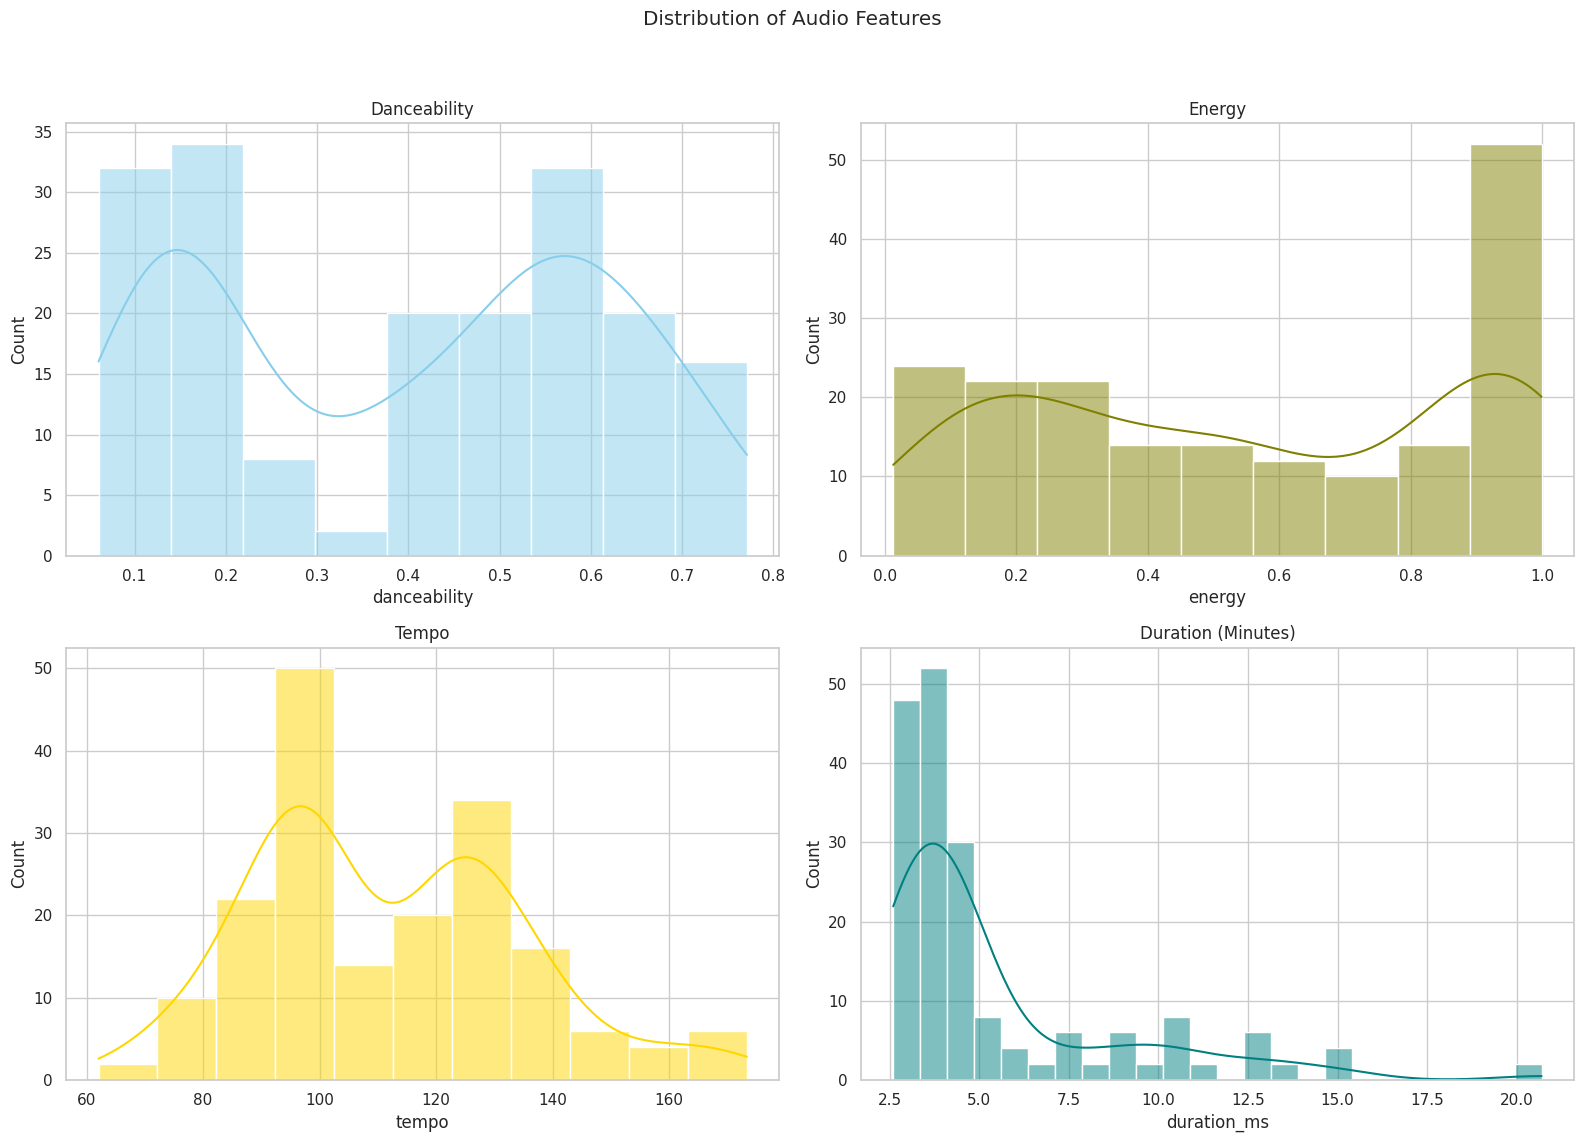

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization
sns.set(style="whitegrid")

# Plotting distributions of selected audio features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Audio Features')

# Danceability
sns.histplot(df['danceability'], ax=axes[0, 0], kde=True, color="skyblue")
axes[0, 0].set_title('Danceability')

# Energy
sns.histplot(df['energy'], ax=axes[0, 1], kde=True, color="olive")
axes[0, 1].set_title('Energy')

# Tempo
sns.histplot(df['tempo'], ax=axes[1, 0], kde=True, color="gold")
axes[1, 0].set_title('Tempo')

# Duration_ms
sns.histplot(df['duration_ms'] / 60000, ax=axes[1, 1], kde=True, color="teal")  # Convert ms to minutes
axes[1, 1].set_title('Duration (Minutes)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


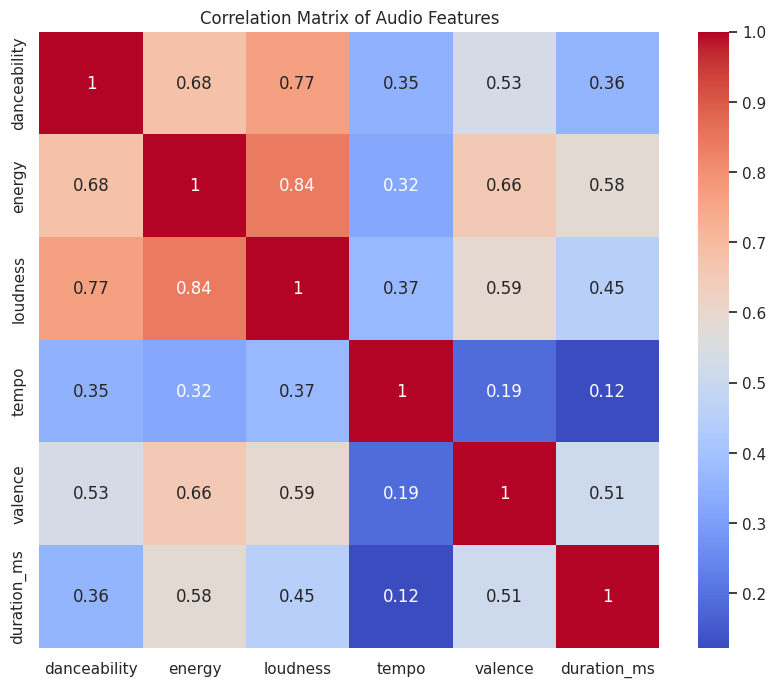

In [8]:
# Calculating and plotting the correlation matrix of selected features
selected_features = ['danceability', 'energy', 'loudness', 'tempo', 'valence', 'duration_ms']
corr_matrix = df[selected_features].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Audio Features')
plt.show()


In [9]:
# Calcolo delle medie delle caratteristiche per ogni artista
mean_features_per_artist = df.groupby('artist')[['danceability', 'energy', 'tempo']].mean().reset_index()

mean_features_per_artist

,artist,danceability,energy,tempo
0,King Gizzard & The Lizard Wizard,0.516216,0.889838,117.630189
1,The Blaze,0.314555,0.314755,107.429745


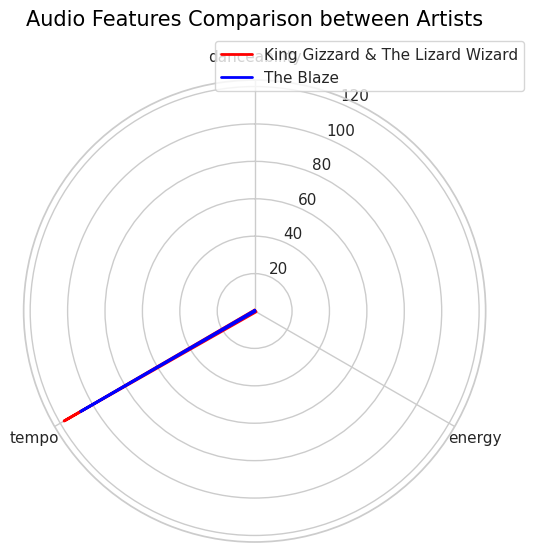

In [10]:
from math import pi

# Preparazione dei dati per il grafico radar
features = ['danceability', 'energy', 'tempo']
num_vars = len(features)

# Calcoliamo gli angoli per ciascuna sezione del grafico radar
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Otteniamo i valori per ciascun artista e aggiungiamo il primo valore alla fine per chiudere il cerchio nel grafico radar
king_gizzard = mean_features_per_artist[mean_features_per_artist['artist'] == "King Gizzard & The Lizard Wizard"][features].values.flatten().tolist()
king_gizzard += king_gizzard[:1]

tame_impala = mean_features_per_artist[mean_features_per_artist['artist'] == "The Blaze"][features].values.flatten().tolist()
tame_impala += tame_impala[:1]

# Inizializzazione del grafico radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Disegno delle linee per King Gizzard & The Lizard Wizard
ax.plot(angles, king_gizzard, color='red', linewidth=2, label='King Gizzard & The Lizard Wizard')
ax.fill(angles, king_gizzard, color='red', alpha=0.25)

# Disegno delle linee per The Blaze
ax.plot(angles, tame_impala, color='blue', linewidth=2, label='The Blaze')
ax.fill(angles, tame_impala, color='blue', alpha=0.25)

# Decorazione del grafico
ax.set_theta_offset(pi / 2)  # Inizia i settori dal top
ax.set_theta_direction(-1)  # Direzione oraria

# Etichette
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)

# Titolo
plt.title('Audio Features Comparison between Artists', size=15, color='black', y=1.1)

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [76]:
!pip install plotly
!pip install nbformat

In [11]:
import plotly.graph_objs as go
import nbformat

# Dati per il grafico radar di Plotly
categories = ['danceability', 'energy', 'tempo']

# Normalizzazione del 'tempo' per compararlo con le altre metriche su una scala simile
df['tempo_normalized'] = df['tempo'] / df['tempo'].max()

# Calcolo delle medie normalizzate delle caratteristiche per ogni artista
mean_features_normalized = df.groupby('artist')[categories].mean().reset_index()

# Creazione di un grafico radar per ciascun artista
fig = go.Figure()

# Aggiunta dei dati al grafico
for index, row in mean_features_normalized.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[categories].values.tolist(),
        theta=categories,
        fill='toself',
        name=row['artist']
    ))

# Aggiunta del layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title={
        'text': "Audio Features Comparison between Artists",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()
